In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

bank_train = pd.read_csv("data/bank_train.csv")
bank_train.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [3]:
bank_test = pd.read_csv("data/bank_test.csv")
bank_test.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,42442,52,entrepreneur,married,primary,no,657,no,no,telephone,7,dec,2,217,1,other
1,30164,34,blue-collar,married,secondary,no,0,yes,yes,cellular,5,feb,6,-1,0,unknown
2,9921,38,housemaid,divorced,primary,no,359,no,no,unknown,9,jun,4,-1,0,unknown
3,31817,58,blue-collar,married,primary,no,189,yes,no,telephone,8,apr,1,-1,0,unknown
4,10333,43,services,married,secondary,no,2478,yes,no,unknown,12,jun,1,-1,0,unknown


In [4]:
bank_test.shape

(1000, 16)

In [5]:
bank_train.shape

(44211, 17)

In [6]:
bank_train.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [7]:
bank_train.describe()

,Unnamed: 0,age,balance,day,campaign,pdays,previous
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000
mean,22614.856846,40.930040,1363.799462,15.811676,2.762751,40.210626,0.580715
std,13057.312051,10.620088,3052.574757,8.324843,3.094049,100.114045,2.311291
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11306.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22616.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33931.500000,48.000000,1430.000000,21.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,58.000000,871.000000,275.000000


In [8]:

bank_train.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
bank_train.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

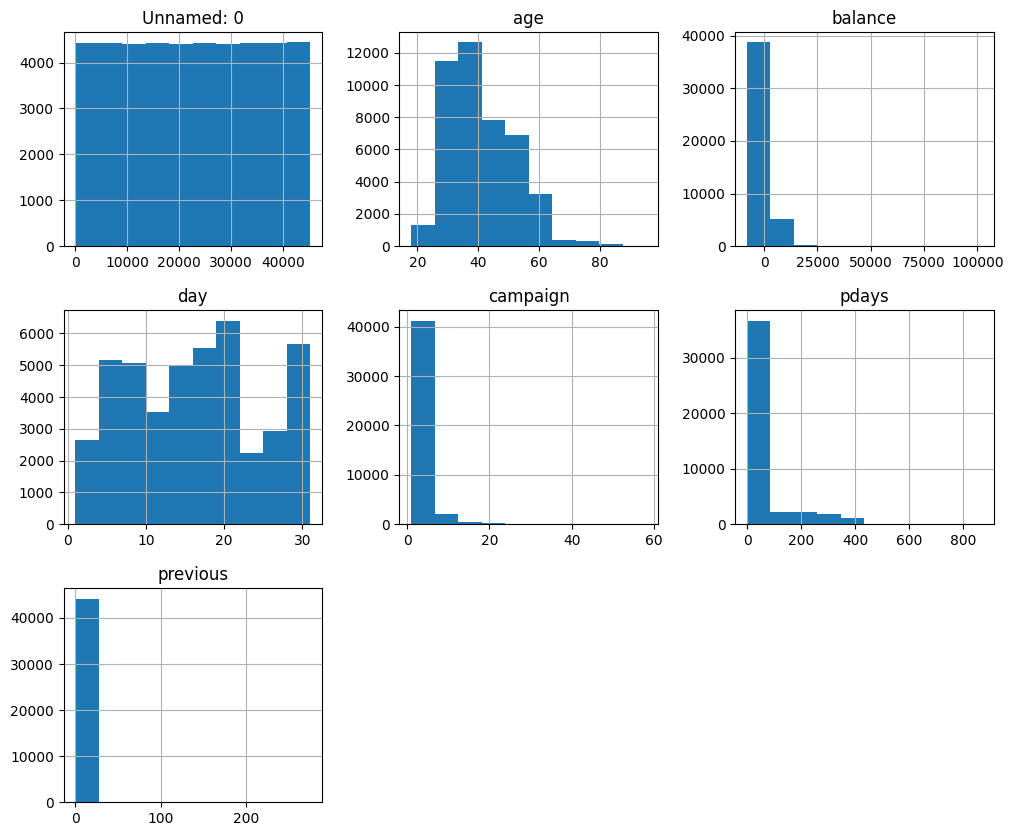

In [10]:

bank_train.hist(figsize=(12, 10))
plt.show()


#it shows that frequency of each column

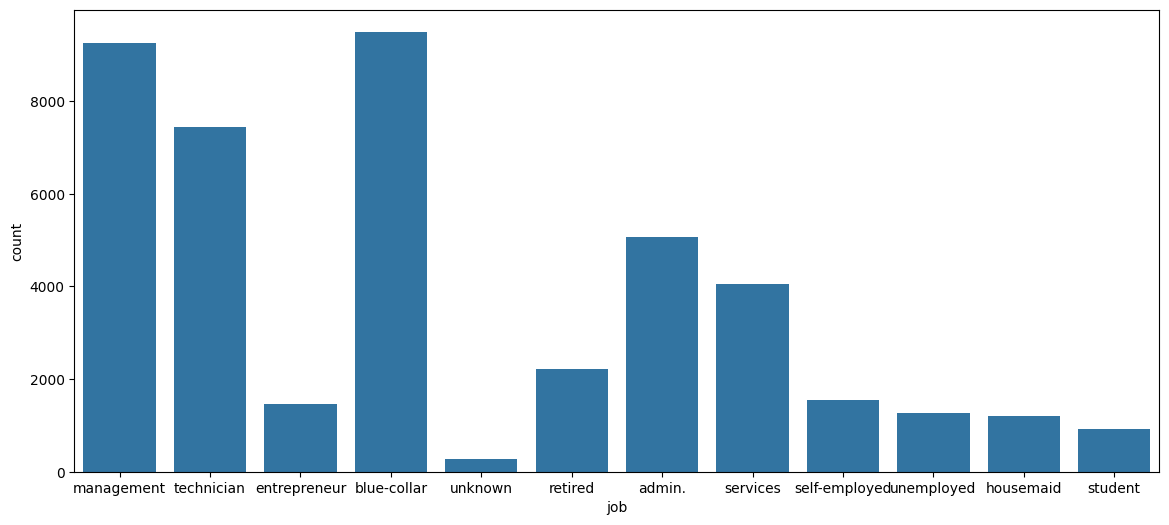

In [11]:
plt.figure(figsize=(14, 6))
sns.countplot(x='job', data=bank_train)
plt.show()


#above histogram its depicts the distribution of job across the diferent age groups

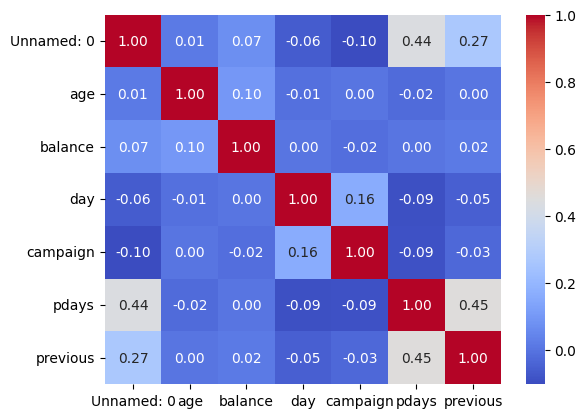

In [12]:
numeric_columns = bank_train.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



#it shows that correlation between different features.

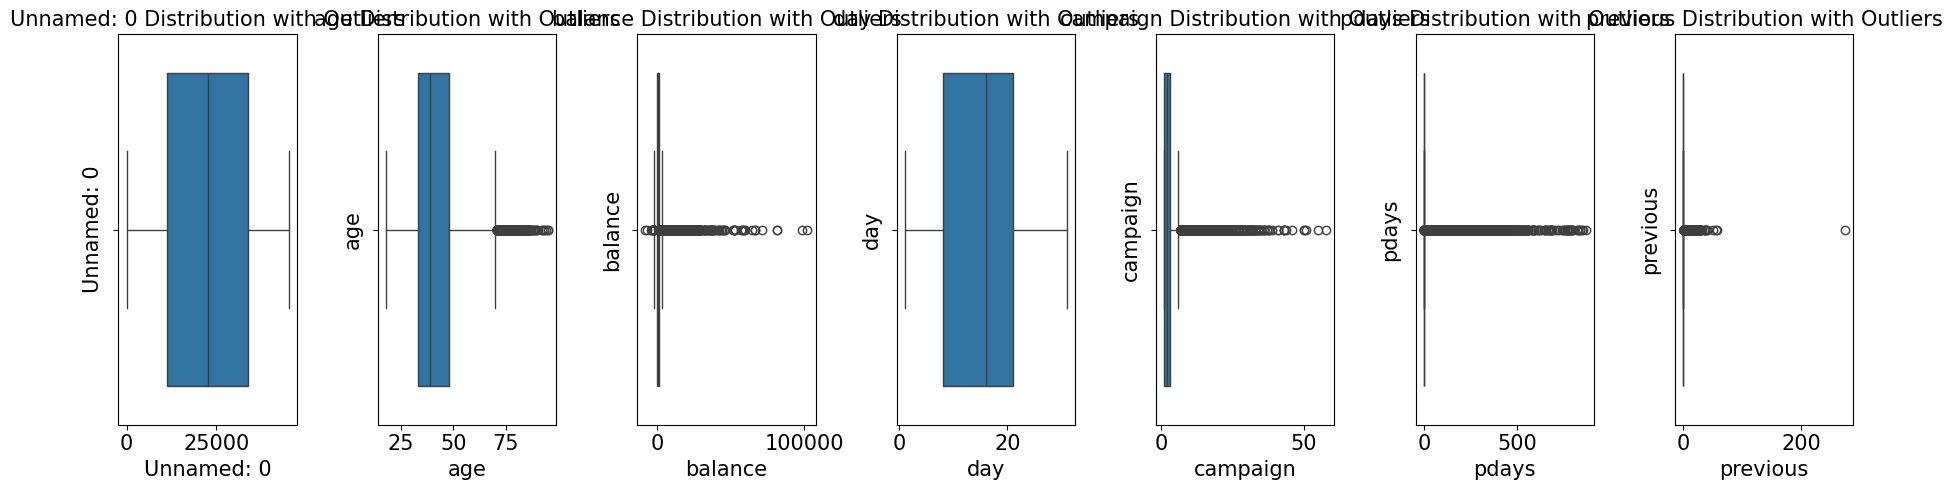

In [13]:
numeric_columns = bank_train.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(18, 5))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=bank_train[column], ax=axes[i])
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel(column, fontsize=15)
    axes[i].set_title(f'{column} Distribution with Outliers', fontsize=15)
    axes[i].tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.show()


#It generates the boxplots to visulize the distribution of numeric columns in dataset. It creates the boxplots showing the distribution of values and checks for outliers.

In [14]:
bank_train = pd.get_dummies(bank_train, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)


#It performs the one hot encoding on categorical features using get_dummies in teh dataset.

In [15]:
bank_train.columns

Index(['Unnamed: 0', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

bank_train[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(bank_train[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])


In [17]:
pip install imbalanced-learn



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = bank_train.drop('y', axis=1)
y = bank_train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)


y_pred = clf.predict(X_test_imputed)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7854
         yes       0.58      0.28      0.38       989

    accuracy                           0.90      8843
   macro avg       0.75      0.63      0.66      8843
weighted avg       0.88      0.90      0.88      8843



In [19]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

X = bank_train.drop('y', axis=1)
y = bank_train['y']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_resampled, y_resampled)


X_val_preprocessed = preprocessor.transform(X_val)
y_val_pred = classifier.predict(X_val_preprocessed)


f1 = f1_score(y_val, y_val_pred, pos_label='yes')
print("Validation F1-Score:", f1)

X_test = pd.read_csv('data/bank_test.csv')
X_test_preprocessed = preprocessor.transform(X_test)

y_test_pred = classifier.predict(X_test_preprocessed)

answers_df = pd.DataFrame({'prediction': y_test_pred})
answers_df.to_csv('answers.csv', index=False)


Validation F1-Score: 0.45016690510252744


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

numeric_indices = [X_train.columns.get_loc(col) for col in numeric_columns]
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
    ])


X_train_preprocessed = preprocessor.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)



svm_param_grid = {
    'preprocessor__num__scaler__with_mean': [True],
    'preprocessor__num__scaler__with_std': [True],
    'preprocessor__cat__imputer__strategy': ['most_frequent'],
    'classifier__C': [0.1],
    'classifier__kernel': ['linear']
}

svm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

svm_grid_search = GridSearchCV(svm_pipe, svm_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
svm_grid_search.fit(X_resampled, y_resampled)

best_svm_classifier = svm_grid_search.best_estimator_

X_val_preprocessed = preprocessor.transform(X_val)
y_val_pred_svm = best_svm_classifier.predict(X_val_preprocessed)
pos_label_svm = y_train.unique()[1]  # Assuming 'yes' is the second unique value
f1_svm = f1_score(y_val, y_val_pred_svm, pos_label=pos_label_svm)

print(f"SVM - Validation F1-Score: {f1_svm}")

classifiers = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
}

for name, classifier in classifiers.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = {
        'preprocessor__num__scaler__with_mean': [True, False],
        'preprocessor__num__scaler__with_std': [True, False],
        'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    }

    if name == 'RandomForest':
        param_grid.update({
            'classifier__n_estimators': [50],
            'classifier__max_depth': [None],
        })
    elif name == 'GradientBoosting':
        param_grid.update({
            'classifier__n_estimators': [50],
            'classifier__learning_rate': [0.01],
            'classifier__max_depth': [3],
        })

    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

    grid_search.fit(X_resampled, y_resampled)

    best_classifier = grid_search.best_estimator_

    X_val_preprocessed = preprocessor.transform(X_val)
    y_val_pred = best_classifier.predict(X_val_preprocessed)
    pos_label = y_train.unique()[1]  
    f1 = f1_score(y_val, y_val_pred, pos_label=pos_label)

    print(f"{name} - Validation F1-Score: {f1}")


In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.3 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train)
y_val_numeric = le.transform(y_val)  

numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

numeric_indices = [X_train.columns.get_loc(col) for col in numeric_columns]
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
    ])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train_numeric)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

param_grid = {
    'preprocessor__num__scaler__with_mean': [True, False],
    'preprocessor__num__scaler__with_std': [True, False],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}


grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_xgb_classifier = grid_search.best_estimator_


X_val_preprocessed = preprocessor.transform(X_val)
y_val_pred_xgb = best_xgb_classifier.predict(X_val_preprocessed)
pos_label_xgb = le.transform([y_train.unique()[1]])[0]  
f1_xgb = f1_score(y_val_numeric, y_val_pred_xgb, pos_label=pos_label_xgb)

print(f"XGBoost - Validation F1-Score: {f1_xgb}")


XGBoost - Validation F1-Score: 0.5476647472808701
